# Capstone : Forcasting Water Levels in Chennai India


*By: Asher Lewis* [Github](https://github.com/abrahamlewis4867)

<img src="D9HGx7FVUAEawA-.jpeg" width="1400px">

---

## Problem Statement

 Water shortage is a massive issue. India is a country that most poised for a water crisis. In June of 2019, water taps ran dry in Chennai, India, severely impacting the city’s 10.6 million residents. We are going to use water data from the cities' 4 main reservoirs in order to forecast if a cities water demands are going to exceed its capacity In order prevent a future water shortage. We are going to be using time series and linear regression. We are going to be using RMSE to score.

The 2019 Chennai water crisis was a water crisis occurring in India, most notably in the city of Chennai in Tamil Nadu. On 19 June 2019, Chennai city officials declared that "Day Zero", or the day when almost no water is left, had been reached, as all the four main reservoirs supplying water to the city had run dry.[1][2] Two years of deficient monsoon rainfall, particularly in late 2017 and throughout much of 2018 had led to this crisis.[3]

Because tap water has stopped running, some families have been relying on alternative water sources such as distant, unreliable public water pumps, and costly private water tankers.[4]

The 2019 Chennai water crisis was a water crisis occurring in India, most notably in the city of Chennai in Tamil Nadu. On 19 June 2019, Chennai city officials declared that "Day Zero", or the day when almost no water is left, had been reached, as all the four main reservoirs supplying water to the city had run dry.[1][2] Two years of deficient monsoon rainfall, particularly in late 2017 and throughout much of 2018 had led to this crisis.[3]

Chennai is a city of over 8 million people, around the size of New York City, and is the fourth largest city in India.[5] The city is an automotive engineering hub and contains many automotive factories that are built around the reservoirs of the city. Mismanagement of the city’s water resources and weak monsoons for the last four years reduced the city’s reservoirs to 0.1% of normal capacity in June 2019.[5] Water became a valuable resource in Chennai and experienced exploitation as wealthier residents paid to dig deep bore wells on their land and sold water to other residents or businesses.[6] This practice was allowed by the government and resulted in the groundwater aquifer to be drained dramatically at twice the level of annual recharge. Protests erupted over the Chennai government’s lack of action on the issue as water was no longer a basic human right in Chennai.[6] The government also faced pressure on their management of the city’s four main reservoirs; Poondi, Cholavaram, Redhills and Chembarambakkam.[5] Factories and infrastructure built in the catchments of these reservoirs were unregulated and therefore much of the rain that fell ended up in the ocean or used in excess by these factories. This further exacerbated the issue and limited the amount of water that entered the reservoirs for public consumption. Monsoon rains in 2019 have been more plentiful in years past and have raised the reservoir levels to around 30% capacity.[7] Chennai has declared itself water secure because of the recent rains but concern remains about the future of water security in Chennai and many other Indian cities such as Bangalore which have similar regulation issues. An Indian government think tank predicted that 21 Indian cities will be out of groundwater by 2020, and the impact of future droughts in India brought upon by climate change will put the entire country at risk unless stronger regulations are put in place.[8]

There are four reservoirs in the city, namely, Red Hills, Cholavaram, Poondi and Chembarambakkam, with a combined capacity of 11,057 mcft.[9]



Three years of failed monsoon in 2016, 2017, and 2018. The 2018 northeast monsoon season was one of the driest ever recorded in Chennai, as only 343.7 mm of rain had fallen compared to an average of 757.6 mm, which was a 55% rainfall deficit. Additionally, the entire state of Tamil Nadu had recorded a 23% rainfall deficit in that season.[10] A major heat wave in India from May to June 2019 further exacerbated the problem by evaporating any water still left in reservoirs.



he construction of a lined channel from Poondi to Tamaraipakkam for a length of 15 km. to convey water from Poondi to Tamaraipakkam was completed in 1972 to reduce the transmission loss. The combined capacities of Sholavaram and Redhills lakes were increased by 700 Mcft by raising the lake bunds. Thus, the combined storage capacity of Poondi, Sholavaram and Redhills was increased to 6296 Mcft (Poondi: 2573 + Cholavaram: 881 + Redhills: 2842). The irrigation rights of Sholavaram lake and Redhills lake were acquired in 1962 and the entire storage was made available for the City supply.

## Executive Summary


First we looked at the varbiles   
and then we modeledl  
base line model
the models got a score of   

---

## Table of Contents


1. [Data Dictionary](#Data-Dictionary)
1. [Loading packages and data](#Loading-packages-and-data)
1. [Data Cleaning](#Data-Cleaning)
1. [EDA](#EDA)
1. [Model Preparation](#Model-Preparation)
1. [Modeling](#Modeling)
 - [Baseline](#Basline)
1. [Model evaluation](#Model-evaluation)
1. [Conclusions and Recommendations](#Conclusions-and-Recommendations)
2. [References](#References)

---

## Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|fire_id|object|fire.csv| Sequential unique whole numbers that are automatically generated and serve as an ID|
|fire_name|object|fire.csv| Name of fire (UNNAMED if not identifiable from source fire occurrence databases)|
|asmnt_type|object|fire.csv| Fire mapping assessment strategy (Initial (SS) (SS=single scene), Initial, or Extended)|

Red Hills, Cholavaram, Poondi and Chembarambakkam, with a combined capacity of 11,057 mcft. These are the major sources of fresh water for the city.

info about the resvoirs

picture of city and resvoirs

## Loading packages and data

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import r2_score
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima

import seaborn as sns
sns.set_style("darkgrid")

In [133]:
reserv= pd.read_csv("./data/chennai_reservoir_levels.csv")

In [134]:
rain = pd.read_csv("./data/chennai_reservoir_rainfall.csv")

p 3231  140
ch 1081  65.50
red hills 3300  50.20
chen 3645  85.40

In [135]:
reserv.head()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,01-01-2004,3.9,0.0,268.0,0.0
1,02-01-2004,3.9,0.0,268.0,0.0
2,03-01-2004,3.9,0.0,267.0,0.0
3,04-01-2004,3.9,0.0,267.0,0.0
4,05-01-2004,3.8,0.0,267.0,0.0


In [136]:
reserv.shape

(5836, 5)

In [57]:
rain.head()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,01-01-2004,0.0,0.0,0.0,0.0
1,02-01-2004,0.0,0.0,0.0,0.0
2,03-01-2004,0.0,0.0,0.0,0.0
3,04-01-2004,0.0,0.0,0.0,0.0
4,05-01-2004,0.0,0.0,0.0,0.0


In [58]:
rain.shape

(5836, 5)

## Cleaning

In [59]:
reserv.rename(columns={"POONDI": "Poondi_water_level", 
                     "CHOLAVARAM": "Cholavaram_water_level",
                     "REDHILLS": "Redhills_water_level",
                    "CHEMBARAMBAKKAM": "Chembarambakkam_water_level"},inplace =True)

In [60]:
rain.rename(columns={"POONDI": "Poondi_rain", 
                     "CHOLAVARAM": "Cholavaram_rain",
                     "REDHILLS": "Redhills_rain",
                    "CHEMBARAMBAKKAM": "Chembarambakkam_rain"},inplace =True)

In [61]:
df = pd.merge(reserv, rain ,on ="Date", how="outer") 

In [62]:
cols = df.columns.tolist()

In [63]:
cols

['Date',
 'Poondi_water_level',
 'Cholavaram_water_level',
 'Redhills_water_level',
 'Chembarambakkam_water_level',
 'Poondi_rain',
 'Cholavaram_rain',
 'Redhills_rain',
 'Chembarambakkam_rain']

In [64]:
water_cols =  ['Poondi_water_level',
 'Cholavaram_water_level',
 'Redhills_water_level',
 'Chembarambakkam_water_level']

In [65]:
rain_cols =['Poondi_rain',
 'Cholavaram_rain',
 'Redhills_rain',
 'Chembarambakkam_rain']

In [66]:
df = df[['Date', 'Poondi_water_level','Poondi_rain','Cholavaram_water_level',
   'Cholavaram_rain', 'Redhills_water_level', 'Redhills_rain', 'Chembarambakkam_water_level','Chembarambakkam_rain'  ]]

In [67]:
df

,Date,Poondi_water_level,Poondi_rain,Cholavaram_water_level,Cholavaram_rain,Redhills_water_level,Redhills_rain,Chembarambakkam_water_level,Chembarambakkam_rain
0,01-01-2004,3.9,0.0,0.0,0.0,268.0,0.0,0.0,0.0
1,02-01-2004,3.9,0.0,0.0,0.0,268.0,0.0,0.0,0.0
2,03-01-2004,3.9,0.0,0.0,0.0,267.0,0.0,0.0,0.0
3,04-01-2004,3.9,0.0,0.0,0.0,267.0,0.0,0.0,0.0
4,05-01-2004,3.8,0.0,0.0,0.0,267.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
5831,19-12-2019,1535.0,0.0,139.0,0.0,2318.0,0.0,1397.0,0.0
5832,20-12-2019,1529.0,0.0,131.0,0.0,2335.0,0.0,1435.0,0.0
5833,21-12-2019,1522.0,0.0,123.0,0.0,2351.0,0.0,1473.0,0.0
5834,22-12-2019,1514.0,0.0,115.0,0.0,2369.0,0.0,1510.0,0.0


In [68]:
df.isna().sum()

Date                           0
Poondi_water_level             0
Poondi_rain                    0
Cholavaram_water_level         0
Cholavaram_rain                0
Redhills_water_level           0
Redhills_rain                  0
Chembarambakkam_water_level    0
Chembarambakkam_rain           0
dtype: int64

In [69]:
df.describe()

,Poondi_water_level,Poondi_rain,Cholavaram_water_level,Cholavaram_rain,Redhills_water_level,Redhills_rain,Chembarambakkam_water_level,Chembarambakkam_rain
count,5836.000000,5836.000000,5836.000000,5836.000000,5836.000000,5836.000000,5836.000000,5836.000000
mean,1116.271270,3.464402,234.265965,3.758773,1533.680166,3.828992,1285.674289,4.012688
std,1020.316805,13.065897,272.289990,14.267783,906.251292,15.011809,964.355749,16.251079
min,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,200.225000,0.000000,18.375000,0.000000,791.000000,0.000000,408.000000,0.000000
50%,775.500000,0.000000,91.000000,0.000000,1596.000000,0.000000,1190.000000,0.000000
75%,1975.000000,0.000000,445.000000,0.000000,2212.250000,0.000000,2047.000000,0.000000
max,3231.000000,300.000000,896.000000,293.000000,3300.000000,320.000000,3396.000000,475.000000


In [70]:
df.eq(0).sum()

Date                              0
Poondi_water_level                0
Poondi_rain                    4647
Cholavaram_water_level         1207
Cholavaram_rain                4780
Redhills_water_level            206
Redhills_rain                  4701
Chembarambakkam_water_level     424
Chembarambakkam_rain           4720
dtype: int64

while the drastic change is the makes sense

In [71]:
df["Date"] = pd.to_datetime(reserv["Date"], format='%d-%m-%Y')

In [72]:
df.dtypes

Date                           datetime64[ns]
Poondi_water_level                    float64
Poondi_rain                           float64
Cholavaram_water_level                float64
Cholavaram_rain                       float64
Redhills_water_level                  float64
Redhills_rain                         float64
Chembarambakkam_water_level           float64
Chembarambakkam_rain                  float64
dtype: object

In [73]:
df.set_index("Date", inplace= True)

In [74]:
df.sort_index(inplace = True)

## EDA

In [75]:
# data.index = pd.date_range(data.index[0],             # start date
#                            periods = len(data.index), # we want one period per entry
#                            freq = 'M')    

In [76]:
rain.dtypes

Date                     object
Poondi_rain             float64
Cholavaram_rain         float64
Redhills_rain           float64
Chembarambakkam_rain    float64
dtype: object

In [77]:
# from https://towardsdatascience.com/advanced-histogram-using-python-bceae288e715

def graph_percentile(col):
    # Generate random data
    data = col

    # Colours for different percentiles
    perc_25_colour = 'gold'
    perc_50_colour = 'mediumaquamarine'
    perc_75_colour = 'deepskyblue'
    perc_95_colour = 'peachpuff'

    # Plot the Histogram from the random data
    fig, ax = plt.subplots(figsize=(8,8))

    '''
    counts  = numpy.ndarray of count of data ponts for each bin/column in the histogram
    bins    = numpy.ndarray of bin edge/range values
    patches = a list of Patch objects.
            each Patch object contains a Rectnagle object. 
            e.g. Rectangle(xy=(-2.51953, 0), width=0.501013, height=3, angle=0)
    '''
    counts, bins, patches = ax.hist(data, facecolor=perc_50_colour, edgecolor='gray')


    # Set the ticks to be at the edges of the bins.
    ax.set_xticks(bins.round(2))
    plt.xticks(rotation=70)

    # Set the graph title and axes titles
    plt.title(f'Distribution of rainfall for {col.name} reservoir in millimetres', fontsize=20)
    plt.ylabel('Count of Distribution', fontsize=15)
    plt.xlabel('Amount rainfall in millimetres', fontsize=15)

    # Change the colors of bars at the edges
    twentyfifth, seventyfifth, ninetyfifth = np.percentile(data, [25, 75, 95])
    for patch, leftside, rightside in zip(patches, bins[:-1], bins[1:]):
        if rightside < twentyfifth:
            patch.set_facecolor(perc_25_colour)
        elif leftside > ninetyfifth:
            patch.set_facecolor(perc_95_colour)
        elif leftside > seventyfifth:
            patch.set_facecolor(perc_75_colour)

    # Calculate bar centre to display the count of data points and %
    bin_x_centers = 0.5 * np.diff(bins) + bins[:-1]
    bin_y_centers = ax.get_yticks()[1] * 0.25

    # Display the the count of data points and % for each bar in histogram
    for i in range(len(bins)-1):
        bin_label = "{0:,}".format(counts[i]) + "  ({0:,.2f}%)".format((counts[i]/counts.sum())*100)
        plt.text(bin_x_centers[i], bin_y_centers, bin_label, rotation=90, rotation_mode='anchor')

    # Annotation for bar values
    ax.annotate('Each bar shows count and percentage of total',
                xy=(.85,.30), xycoords='figure fraction',
                horizontalalignment='center', verticalalignment='bottom',
                fontsize=10, bbox=dict(boxstyle="round", fc="white"),
                rotation=-90)

    #create legend
    handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in [perc_25_colour, perc_50_colour, perc_75_colour, perc_95_colour]]
    labels= ["0-25 Percentile","25-50 Percentile", "50-75 Percentile", ">95 Percentile"]
    plt.legend(handles, labels, bbox_to_anchor=(0.5, 0., 0.80, 0.99))



In [80]:
graph_percentile(rain["Poondi_water_level"])

KeyError: 'Poondi_water_level'

In [ ]:
reserv.index.inferred_freq

In [ ]:
print("Data starts at:", reserv.index[0])
print("Data ends at:", reserv.index[-1])
print("Total time observed:", reserv.index[-1] - reserv.index[0])

#### Checking if data is time-series has constant frequency

In [ ]:
rain.resample("m").sum().plot(figsize=(20,10));

In [ ]:
rain.index.inferred_freq

In [ ]:
# from lesson
print("Data starts at:", rain.index[0])
print("Data ends at:", rain.index[-1])
print("Total time observed:", rain.index[-1] - reserv.index[0])

In [ ]:
plt.title("water")
plt.hist(rain.index)
plt.xlabel("Year")
plt.ylabel("Frequency");

In [ ]:
plt.title("water_level")
plt.hist(reserv.index)
plt.xlabel("Year")
plt.ylabel("Frequency");

In [ ]:
reserv.resample("m").mean().plot(figsize=(20,10))
plt.title("rain")
plt.xlabel("rain")
plt.ylabel("water in");

In [ ]:
rain.resample("y").mean().plot(figsize=(20,10));

In [ ]:
reserv.resample("m").mean().plot(figsize=(20,10));

In [ ]:

rain["Redhills"].plot(figsize=(12,6))
plt.title("rain")
plt.xlabel("rain")
plt.ylabel("water in");

In [ ]:
reserv.plot(figsize=(20,10))
plt.title("rain")
plt.xlabel("rain")
plt.ylabel("water in");

In [ ]:
col_names= ['Poondi', 'Cholavaram', 'Redhills', 'Chembarambakkam']

In [ ]:
rain.columns

In [ ]:
rain.sort_values(by=col_names, ascending=False).head()

The 2015 South India floods resulted from heavy rainfall generated by the annual monsoon

In [ ]:
plt.figure(figsize=(10, 6))
sns.distplot(a=reserv["Poondi"], kde=False);

In [ ]:
plt.figure(figsize=(10, 6))
sns.distplot(a=reserv["Poondi"], kde=False);

In [ ]:
plt.figure(figsize=(10, 6))
sns.distplot(a=reserv["Redhills"], kde=False);

In [ ]:
plt.figure(figsize=(10, 6))
sns.distplot(a=reserv["Chembarambakkam"], kde=False);

With the major source of water for the city fully dry, the water needs is being partially met by other sources mentioned above. Of the estimated need of 830 MLD (Million Liters per Day) of water, 500 MLD is being met by following resources.b

In [ ]:
rain

In [ ]:
rain.sort_values(by="Chembarambakkam", ascending= False).head()

### Determine significant lags



---

### Autocorrelation Function (ACF)
Autocorrelation Function (ACF) shows the correlation of $Y$ versus it's lagged self for a specifed number of periods.

In [ ]:
# fig, axes = plt.subplots(figsize=(12,4),ncols = 2)
# # Plot ACF with original data
# plot_acf(data['bus_ridership'], lags = 10, ax = axes[0])
# axes[0].set_title("Autocorrelation for original dataset")

# # Plot ACF with diff_2
# plot_acf(diff_2.dropna(), lags = 10, ax = axes[1])
# axes[1].set_title("Autocorrelation for twice differenced dataset");

In [79]:
plot_acf(reserv['Chembarambakkam'], lags = 24)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation with $lag = 0$");

KeyError: 'Chembarambakkam'

**ACF Interpretations**
The blue band of an ACF plot indicates the 95% confidence interval for these correlations between each lag and the original target <br>
_(THINK BACK: how would we use confidence intervals as an alternative to hypothesis testing?)_
- Observations inside the blue band _(fail to reject $H_0$: not statistically significant)_ mean that there is NO significant correlations between $Y_t$ and $Y_{t-k}$ for lag $k$.
- Observations outside the blue band _(reject $H_0$: statistically significant)_ mean that there **is** a significant correlation between $Y_t$ and $Y_{t-k}$ for lag $k$.

However...the ACF looks at __the correlation between the two time periods, but has the effect of other time periods mixed into it.__ In other words, $ACF_3$ doesn't remove the effect of how $Y_{t-1}$ and $Y_{t-2}$ are correlated, amongst other lagged pairs. How do we account for this then?

### Partial Autocorrelation Function (PACF)
The partial autocorrelation is correlation at a given lag, controlling for the effect of previous lags. In other words, it is the __correlation that results after removing the effect of any correlations due to the terms at shorter lags__

In [ ]:
plot_pacf(reserv['Chembarambakkam'], lags = 24)
plt.xlabel("Lag")
plt.ylabel("Partial Autocorrelation with $lag = 0$");

Each of the values above represent an autocorrelation coefficient for each of the lags:
$$ACF_1 = \text{corr}(Y_t, Y_{t-1})$$
$$ACF_2 = \text{corr}(Y_t, Y_{t-2})$$
$$ACF_3 = \text{corr}(Y_t, Y_{t-3})$$
$$\dots$$
$$ACF_k = \text{corr}(Y_t, Y_{t-k})$$

### How does the ACF and PACF tell us the $p$ and $q$?

By looking at these function graphs, we can elucidate the AR and MA components directly (difficult) or use them to better inform grid searching (easier).

Determining each component is often difficult to do, as the decision "rules" are built on theoretical value and real data rarely follow these theoretical guidelines. __You can try your hand at the bottom [Challenge: Determining $p$ and $q$ the old-fashioned way](#Challenge:-Determining-$p$-and-$q$-the-old-fashioned-way)__

Common alternatives include:
- using `auto_arima`, which is a pre-made SARIMAX function for gridsearching both ARIMA and SARIMAX orders
- using a custom grid search function
- In general, the values for $p$ and $q$ are typically low values - between 0 and 2, but can be more.
- _We can still use some intuition from the ACF and PACF to guild our process - this takes time and experience working with time-series data_

In [92]:
df["time"] = range(len(df))

##### when you have a lot of zero values in p

In [93]:
def multi_lag_appender(df, column, lags, inplace = False):
    '''Appends the appropriate lag from the list of given lags to the give dataframe'''
    # copying datafame unless inplace = True
    df = df if inplace else df.copy()
    for lag in lags:
        df[f"{column}_{lag}"] = df[column].shift(lag)
    
    return None if inplace else df

In [94]:
desired_lags = [1, 2, 3, 4, 8, 9, 10, 11, 12, 13]
reserv_with_lags = multi_lag_appender(df, "Chembarambakkam_water_level", desired_lags)
reserv_with_lags.head(14)

,Poondi_water_level,Poondi_rain,Cholavaram_water_level,Cholavaram_rain,Redhills_water_level,Redhills_rain,Chembarambakkam_water_level,Chembarambakkam_rain,time,Chembarambakkam_water_level_1,Chembarambakkam_water_level_2,Chembarambakkam_water_level_3,Chembarambakkam_water_level_4,Chembarambakkam_water_level_8,Chembarambakkam_water_level_9,Chembarambakkam_water_level_10,Chembarambakkam_water_level_11,Chembarambakkam_water_level_12,Chembarambakkam_water_level_13
Date,,,,,,,,,,,,,,,,,,,
2004-01-01,3.9,0.0,0.0,0.0,268.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-02,3.9,0.0,0.0,0.0,268.0,0.0,0.0,0.0,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-03,3.9,0.0,0.0,0.0,267.0,0.0,0.0,0.0,2,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-04,3.9,0.0,0.0,0.0,267.0,0.0,0.0,0.0,3,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-05,3.8,0.0,0.0,0.0,267.0,0.0,0.0,0.0,4,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-06,3.8,0.0,0.0,0.0,266.0,0.0,0.0,0.0,5,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-07,3.8,0.0,0.0,0.0,266.0,0.0,0.0,0.0,6,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-08,3.7,0.0,0.0,0.0,265.0,0.0,0.0,0.0,7,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-09,3.7,0.0,0.0,0.0,264.0,0.0,0.0,0.0,8,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [95]:
reserv_with_lags.shape

(5836, 19)

In [96]:
reserv_with_lags.dropna(inplace= True)

In [97]:
reserv_with_lags

,Poondi_water_level,Poondi_rain,Cholavaram_water_level,Cholavaram_rain,Redhills_water_level,Redhills_rain,Chembarambakkam_water_level,Chembarambakkam_rain,time,Chembarambakkam_water_level_1,Chembarambakkam_water_level_2,Chembarambakkam_water_level_3,Chembarambakkam_water_level_4,Chembarambakkam_water_level_8,Chembarambakkam_water_level_9,Chembarambakkam_water_level_10,Chembarambakkam_water_level_11,Chembarambakkam_water_level_12,Chembarambakkam_water_level_13
Date,,,,,,,,,,,,,,,,,,,
2004-01-14,3.5,0.0,0.0,0.0,260.0,0.0,0.0,0.0,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2004-01-15,3.5,0.0,0.0,0.0,259.0,0.0,0.0,0.0,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2004-01-16,3.4,0.0,0.0,0.0,258.0,0.0,0.0,0.0,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2004-01-17,3.4,0.0,0.0,0.0,256.0,0.0,0.0,0.0,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2004-01-18,3.4,0.0,0.0,0.0,254.0,0.0,0.0,0.0,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-19,1535.0,0.0,139.0,0.0,2318.0,0.0,1397.0,0.0,5831,1359.0,1320.0,1298.0,1277.0,1205.0,1190.0,1178.0,1166.0,1154.0,1142.0
2019-12-20,1529.0,0.0,131.0,0.0,2335.0,0.0,1435.0,0.0,5832,1397.0,1359.0,1320.0,1298.0,1220.0,1205.0,1190.0,1178.0,1166.0,1154.0
2019-12-21,1522.0,0.0,123.0,0.0,2351.0,0.0,1473.0,0.0,5833,1435.0,1397.0,1359.0,1320.0,1235.0,1220.0,1205.0,1190.0,1178.0,1166.0


## Determining $p$ and $q$ - A Deep Dive

- This is annother important step in preparing data to be used in an ARIMA model!
- The "AR" in ARIMA stands for "Autoregressive"
    - Is denoted as $p$ in the model's order
- The "MA" in ARIMA stands for "Moving Average"
    - Is denoted as $q$ in the model's order
- Both components are asking...

#### How correlated is $y$ with its past selves?

We have two measures of this: *Autocorrelation* and *Partial Autocorrelation*.

## Model Preparation

In [112]:
cols

['Poondi_water_level',
 'Cholavaram_water_level',
 'Redhills_water_level',
 'Chembarambakkam_water_level',
 'Poondi_rain',
 'Cholavaram_rain',
 'Redhills_rain',
 'Chembarambakkam_rain']

In [99]:
X = reserv_with_lags.drop(columns=cols[1:])
y = reserv_with_lags["Chembarambakkam_water_level"]

# must NOT shuffle for time series
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .26, shuffle = False)

In [100]:
y

Date
2004-01-14       0.0
2004-01-15       0.0
2004-01-16       0.0
2004-01-17       0.0
2004-01-18       0.0
               ...  
2019-12-19    1397.0
2019-12-20    1435.0
2019-12-21    1473.0
2019-12-22    1510.0
2019-12-23    1548.0
Name: Chembarambakkam_water_level, Length: 5823, dtype: float64

In [101]:
X

,time,Chembarambakkam_water_level_1,Chembarambakkam_water_level_2,Chembarambakkam_water_level_3,Chembarambakkam_water_level_4,Chembarambakkam_water_level_8,Chembarambakkam_water_level_9,Chembarambakkam_water_level_10,Chembarambakkam_water_level_11,Chembarambakkam_water_level_12,Chembarambakkam_water_level_13
Date,,,,,,,,,,,
2004-01-14,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2004-01-15,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2004-01-16,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2004-01-17,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2004-01-18,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-19,5831,1359.0,1320.0,1298.0,1277.0,1205.0,1190.0,1178.0,1166.0,1154.0,1142.0
2019-12-20,5832,1397.0,1359.0,1320.0,1298.0,1220.0,1205.0,1190.0,1178.0,1166.0,1154.0
2019-12-21,5833,1435.0,1397.0,1359.0,1320.0,1235.0,1220.0,1205.0,1190.0,1178.0,1166.0


---

## Modeling

### Baseline

In [102]:
dumb = DummyRegressor(strategy='mean')

In [103]:
y_train.mean()

1430.850812253423

In [104]:
dumb.fit(X_train, y_train)

DummyRegressor(constant=None, quantile=None, strategy='mean')

In [105]:
dumb.predict(X)


array([1430.85081225, 1430.85081225, 1430.85081225, ..., 1430.85081225,
       1430.85081225, 1430.85081225])

In [106]:
dumb.score(X_train, y_train)

0.0

In [107]:
dumb.score(X_test, y_test)

-0.33521409583375195

---

### Linear Regression

In [108]:
# instantiate
lr = LinearRegression()

# fit (original model fitted)
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [110]:
lr.score(X_train, y_train)

0.9917212930931044

In [111]:
lr.score(X_test, y_test)

0.9954689001551672

In [114]:
X = reserv_with_lags.drop(columns=cols[1:])

X = sm.add_constant(X) # MUST add constant for statsmodels

y = reserv_with_lags["Chembarambakkam_water_level"]

# must NOT shuffle for time series
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, shuffle = False)

In [115]:
# instantiate
ols = sm.OLS(y_train, X_train) # notice y goes first!

# fit
fitted_ols = ols.fit() # returned model is fitted, not the original!

In [116]:
fitted_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Chembarambakkam_water_level   R-squared:                       0.992
Model:                                     OLS   Adj. R-squared:                  0.992
Method:                          Least Squares   F-statistic:                 5.185e+04
Date:                         Tue, 01 Sep 2020   Prob (F-statistic):               0.00
Time:                                 23:39:08   Log-Likelihood:                -27281.
No. Observations:                         4658   AIC:                         5.459e+04
Df Residuals:                             4646   BIC:                         5.466e+04
Df Model:                                   11                                         
Covariance Type:                     nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              7.0227      3.036      2.313      0.021       1.070      12.975
time                              -0.0003      0.001     -0.304      0.762      -0.002       0.002
Chembarambakkam_water_level_1      0.7015      0.015     47.976      0.000       0.673       0.730
Chembarambakkam_water_level_2      0.2393      0.018     13.379      0.000       0.204       0.274
Chembarambakkam_water_level_3      0.0091      0.018      0.503      0.615      -0.026       0.044
Chembarambakkam_water_level_4      0.0896      0.016      5.546      0.000       0.058       0.121
Chembarambakkam_water_level_8      0.0082      0.016      0.504      0.614      -0.024       0.040
Chembarambakkam_water_level_9     -0.0009      0.018     -0.048      0.962      -0.036       0.035
Chembarambakkam_water_level_10    -0.0028      0.018     -0.152      0.879      -0.039       0.033
Chembarambakkam_water_level_11    -0.0092      0.018     -0.506      0.613      -0.045       0.026
Chembarambakkam_water_level_12    -0.0058      0.018     -0.325      0.746      -0.041       0.029
Chembarambakkam_water_level_13    -0.0331      0.015     -2.255      0.024      -0.062      -0.004
==============================================================================
Omnibus:                     6645.340   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         37934638.922
Skew:                           7.282   Prob(JB):                         0.00
Kurtosis:                     444.863   Cond. No.                     1.46e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [117]:
y_train_preds = fitted_ols.predict(X_train)
r2_score(y_train, y_train_preds)

0.9919203727152522

In [118]:
y_test_preds = fitted_ols.predict(X_test)
r2_score(y_test, y_test_preds)

0.9907998834085031

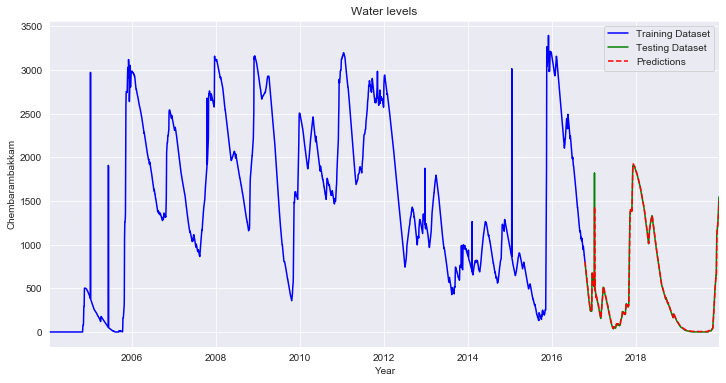

In [119]:
# Get forecasts for testing set
preds = fitted_ols.predict(X_test)

plt.figure(figsize=(12,6))
plt.title("Water levels")

# Plot time series predictions against actual values for ENTIRE dataset
y_train.plot(style="b")
y_test.plot(style="g")
preds.plot(style="r--") # red with dash
plt.xlabel("Year")
plt.ylabel("Chembarambakkam")
plt.legend(labels = ["Training Dataset", "Testing Dataset", "Predictions"]);

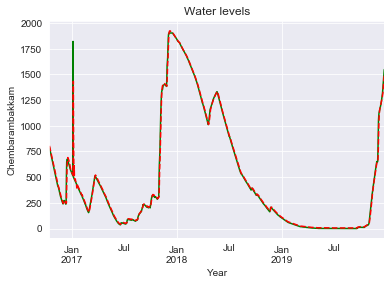

In [120]:
y_test.plot(style='g') 
preds.plot(style='r--')
plt.xlabel("Year")
plt.ylabel("Chembarambakkam")
plt.title("Water levels");

### ARIMA

In [121]:
fitted_arima = auto_arima(
    y_train, # data
    start_p = 0,
    start_q = 0,
    max_p = 2,
    max_q = 2,
    d = 2, # we know how much to difference, so don't need to waste time searching for this
    stationary = False, # being explicit our original dataset is not stationary
    seasonal=False, # ignoring seasonality (for this lesson...)
    solver='lbfgs', # might change, depending on data
    trace=True,
    error_action='ignore',  # don't want to know if an order does not work
    suppress_warnings=True  # don't want convergence warnings
)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=59362.984, Time=0.14 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=57045.177, Time=0.20 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.15 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=59360.984, Time=0.05 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=56339.560, Time=0.32 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.96 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.57 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=56337.560, Time=0.12 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=57043.177, Time=0.08 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=1.77 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=1.12 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 10.480 seconds


In [122]:
fitted_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 4658
Model:               SARIMAX(2, 2, 0)   Log Likelihood              -28165.780
Date:                Tue, 01 Sep 2020   AIC                          56337.560
Time:                        23:39:53   BIC                          56356.898
Sample:                             0   HQIC                         56344.362
                               - 4658                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8616      0.001   -772.277      0.000      -0.864      -0.859
ar.L2         -0.3754      0.002   -240.725      0.000      -0.378      -0.372
sigma2      1.052e+04     16.988    619.284      0.000    1.05e+04    1.06e+04
===================================================================================
Ljung-Box (Q):                      673.85   Jarque-Bera (JB):          41000528.40
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.48   Skew:                            -4.56
Prob(H) (two-sided):                  0.00   Kurtosis:                       462.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Remember: ARIMA(p,d,q)  

𝑝 = the number of autoregression lags  
𝑑 = degree of differencing  
𝑞 = the number of moving average lags  

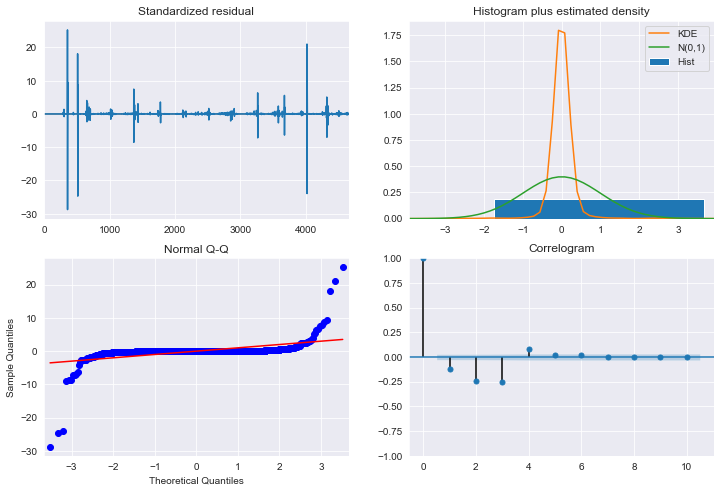

In [123]:
fitted_arima.plot_diagnostics(figsize = (12, 8));

In [126]:
order = (2,2,0) # the order I want to use

# instantiate
bus_arima = ARIMA(y_train, order = order) # freq is optional

# fit
fitted_bus_arima = bus_arima.fit() 

/Users/abrahamlewis/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/abrahamlewis/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [127]:
fitted_bus_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   ARIMA Model Results                                    
==========================================================================================
Dep. Variable:     D2.Chembarambakkam_water_level   No. Observations:                 4656
Model:                             ARIMA(2, 2, 0)   Log Likelihood              -28165.787
Method:                                   css-mle   S.D. of innovations            102.548
Date:                            Tue, 01 Sep 2020   AIC                          56339.573
Time:                                    23:42:20   BIC                          56365.357
Sample:                                01-16-2004   HQIC                         56348.643
                                     - 10-14-2016                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -0.0028      0.672     -0.004      0.997      -1.320       1.314
ar.L1.D2.Chembarambakkam_water_level    -0.8616      0.014    -63.441      0.000      -0.888      -0.835
ar.L2.D2.Chembarambakkam_water_level    -0.3754      0.014    -27.647      0.000      -0.402      -0.349
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1475           -1.1606j            1.6321           -0.3741
AR.2           -1.1475           +1.1606j            1.6321            0.3741
-----------------------------------------------------------------------------
"""

#### Determining Stationarity

In [128]:
num_steps = len(y_test)
forecast, std_error, conf_int = fitted_bus_arima.forecast(steps = num_steps)

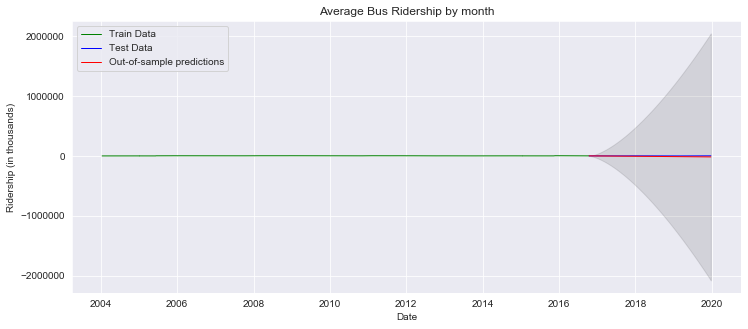

In [129]:
lower_conf_int = conf_int[:,0]
upper_conf_int = conf_int[:,1]

plt.figure(figsize=(12,5))
plt.title("Average Bus Ridership by month")

# train data
plt.plot(y_train.index, y_train, lw=1, color='green', ls='solid',label='Train Data')

# test data
plt.plot(y_test.index, y_test, lw=1, color='blue', ls='solid',label='Test Data')

# forecast data
plt.plot(y_test.index, forecast, lw=1, color='red', ls="solid",  label='Out-of-sample predictions')
plt.xlabel("Date")
plt.ylabel("Ridership (in thousands)")

# conf int
plt.fill_between(y_test.index, lower_conf_int, upper_conf_int, color='k', alpha=0.1);
plt.legend(loc = "upper left");

Formally speaking, a stationary time series is one that

has a mean and variance that are constant over time. It is easier to predict when the series is stationary (no trend).
has an autocorrelation that depends only on lag 𝑘, but not on "base" time 𝑡 (target is independent from time)
e.g. AR(1) is a stationary process because corr(𝑌𝑡,𝑌𝑡−𝑘)=𝛽𝑘1, which is a constant that depends on 𝑘 but not 𝑡
The simple story: to check stationarity, we can...

Visually look at the mean and variance: is it constant? If not, then our time series is not stationary (it should look like noise).
Visually look at the autocorrelation: does the relationship between, for example, 𝑌1 and 𝑌11 look the same as the relationship between 𝑌51 and 𝑌61? If not, then our time series is not stationary.
Apply Augmented Dickey-Fuller test.

In [ ]:
def interpret_dftest(target_column):
    '''Returns the Test Statistic and p-value for Augmented Dickey-Fuller test on given target column'''
    dftest = adfuller(target_column)
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    return dfoutput

In [ ]:
plt.plot(reserv['Chembarambakkam']);
plt.title(label='Monthly Ridership (d = 0)', fontsize = 16)
plt.xlabel("Year")
plt.ylabel("Ridership (in thousands)");

In [ ]:
reserv.diff()

In [ ]:
reserv.pct_change().head()

In [ ]:
interpret_dftest(reserv['Chembarambakkam'])

## Conclusions and Recommendations

calling to an email you sent fail claim if you go into do page weeks to be claimed will give you call back

## References